# Laboratorio 2: Estudio de correlacion de diferentes variables en un grupo de jóvenes #

#### Autores: Gonzalo Oviedo, Marcelo Cena####


#### En esta oportunidad, a partir del análisis del set de datos provisto, realizaremos diversos estudios de correlacion entre el genero y los demas datos provistos, seguidamente nos enfocaremos en analizar la existencia de correlación alguna entre la cantidad de tiempo en internet y el género de las personas para determinar si esto influye. ####

En este mundo en el que nos encontramos constantemente "en línea", un [estudio reciente](https://www.linkedin.com/feed/news/the-loneliest-generation-in-america-1045420/), mostró que un 54% de individuos de la nueva generación (aquellos nacidos entre 1990 y 2005), respondieron afirmativamente a sentirse solos.

Debido a las diferentes implicancias en cuestiones de salud, nos disponemos a analizar en nuestros datos quienes son los que han respondido ser "adictos" y responder a la pregunta inicial, referida a la correlación entre el sexo y la "adicción" a estar conectados.

In [1]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as stats
import copy
pd.set_option('display.max_columns',150)
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")
sb.set_style('whitegrid')
sb.set_context('talk')

dataset = pd.read_csv( './Laboratorio_1/responses.csv', encoding='utf8')


## Primer contacto con los datos ##

Comenzaremos haciendo un estudio general de la relacion entre el género y las diversas variables, para despues enfocarnos en la cantidad de personas que manifiestan tener conexión a internet al menos una vez al día. Surge rápidamente de este análisis que solo el 0.29% de las personas se ha manifestado negativamente.

In [2]:
var_cat_interest = []
print("\nCantidad de Personas:   "+str(dataset.shape[0]))
print("Cantidad de Categorías: "+str(dataset.shape[1]))


Cantidad de Personas:   1010
Cantidad de Categorías: 150


#### Veremos la distribucion de edad ####

In [3]:
dataset.Age.dropna().describe().to_frame()

,Age
count,1003.000000
mean,20.433699
std,2.828840
min,15.000000
25%,19.000000
50%,20.000000
75%,22.000000
max,30.000000


#### Veremos ahora la distribucion por sexo de la muestra: ####

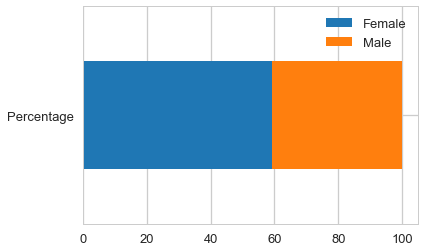

In [4]:
sex = dataset.Gender.value_counts(normalize=True)
sex.to_frame()
sexo = pd.DataFrame({'Female':sex.female*100, 'Male':sex.male*100}, index=['Percentage'])
ax = sexo.plot(kind="barh", stacked=True);

#### Ahora veremos cuantos viven en la ciudad y cuantos en el campo ####

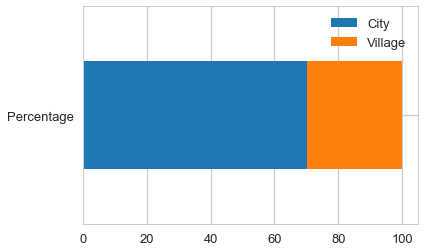

In [5]:
lugar = dataset['Village - town'].value_counts(normalize=True)
lugar.to_frame()
lg = pd.DataFrame({'Village':lugar.village*100, 'City':lugar.city*100}, index=['Percentage'])
ax = lg.plot(kind="barh", stacked=True);

## Ahora relacionaremos el genero con algunas de las otras respuestas: ##


In [6]:
inte_genero = pd.crosstab(dataset.Gender, dataset['Internet usage'],         margins=True, normalize=True)
educ_genero = pd.crosstab(dataset.Gender, dataset['Education'],              margins=True, normalize=True)
zude_genero = pd.crosstab(dataset.Gender, dataset['Left - right handed'],    margins=True, normalize=True)
hu_genero = pd.crosstab(dataset.Gender, dataset['Only child'],             margins=True, normalize=True)
puci_genero = pd.crosstab(dataset.Gender, dataset['Village - town'],         margins=True, normalize=True)
fuma_genero = pd.crosstab(dataset.Gender, dataset['Smoking'] ,               margins=True, normalize=True)
alco_genero = pd.crosstab(dataset.Gender, dataset['Alcohol'],                margins=True, normalize=True)
punt_genero = pd.crosstab(dataset.Gender, dataset['Punctuality'],            margins=True, normalize=True)

#Muestro las tablas de contingencia
if True:
    display(inte_genero)
    display(educ_genero)
    display(zude_genero)
    display(punt_genero)
    display(puci_genero)
    display(fuma_genero)
    display(alco_genero)


Internet usage,few hours a day,less than an hour a day,most of the day,no time at all,All
Gender,,,,,
female,0.426295,0.102590,0.059761,0.001992,0.590637
male,0.310757,0.035857,0.061753,0.000996,0.409363
All,0.737052,0.138446,0.121514,0.002988,1.000000


Education,college/bachelor degree,currently a primary school pupil,doctorate degree,masters degree,primary school,secondary school,All
Gender,,,,,,,
female,0.122632,0.005982,0.000000,0.043868,0.053838,0.363908,0.590229
male,0.088734,0.003988,0.004985,0.035892,0.023928,0.252243,0.409771
All,0.211366,0.009970,0.004985,0.079761,0.077767,0.616152,1.000000


Left - right handed,left handed,right handed,All
Gender,,,
female,0.046953,0.543457,0.59041
male,0.052947,0.356643,0.40959
All,0.099900,0.900100,1.00000


Punctuality,i am always on time,i am often early,i am often running late,All
Gender,,,,
female,0.218563,0.186627,0.185629,0.590818
male,0.177645,0.136727,0.094810,0.409182
All,0.396208,0.323353,0.280439,1.000000


Village - town,city,village,All
Gender,,,
female,0.417,0.174,0.591
male,0.287,0.122,0.409
All,0.704,0.296,1.000


Smoking,current smoker,former smoker,never smoked,tried smoking,All
Gender,,,,,
female,0.111446,0.109438,0.123494,0.246988,0.591365
male,0.078313,0.065261,0.084337,0.180723,0.408635
All,0.189759,0.174699,0.207831,0.427711,1.000000


Alcohol,drink a lot,never,social drinker,All
Gender,,,,
female,0.104104,0.068068,0.418418,0.590591
male,0.117117,0.055055,0.237237,0.409409
All,0.221221,0.123123,0.655656,1.000000


## Vamos a presentar en Gráficos la informacion mostrada en las tablas ##



#### Uso de Internet: ####

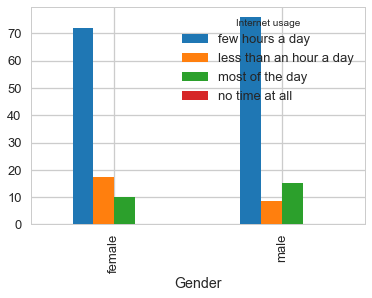

In [7]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Internet usage']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

#### Nivel de Educación ####

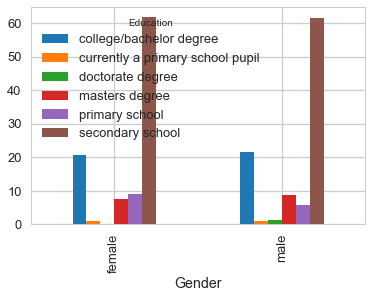

In [8]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Education']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

#### Cuantos son Zurdos y cuantos Derechos ####

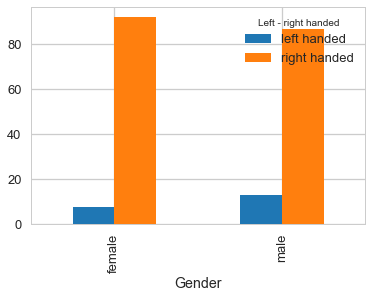

In [9]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Left - right handed']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

#### Cuantos son Hijos únicos###

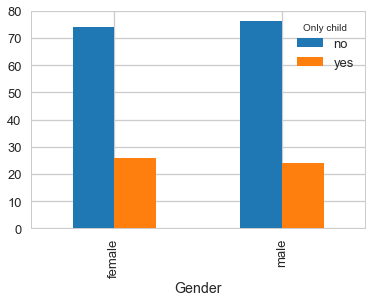

In [10]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Only child']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

#### Cuantos viven en la ciudad y cuantos en el campo ####

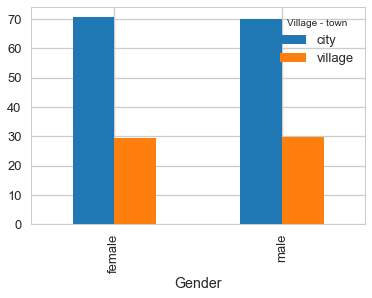

In [11]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Village - town']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

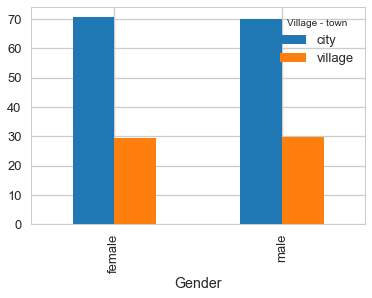

In [12]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Village - town']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

#### Cuantos Fuman ####

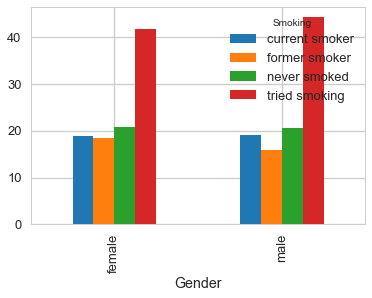

In [13]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Smoking']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

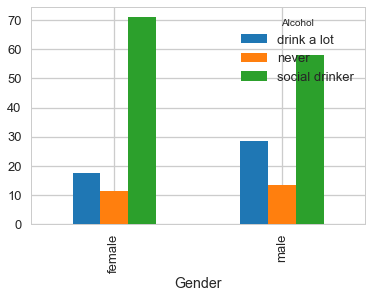

In [14]:
plot= pd.crosstab(index=dataset['Gender'],
            columns=dataset['Alcohol']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

#### Ahora analizaremos con mas detalle la relacion entre el uso de internet, el sexo y el sentimiento de soledad.###

En una primera aproximación veremos cuantos y como usan internet:

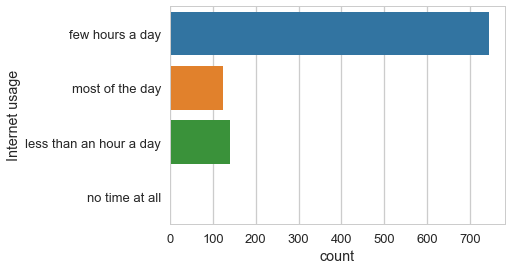

In [15]:
sb.countplot(y="Internet usage", data=dataset)


## Contemplamos el género ##

En este punto detectamos que cerca del 60% de nuestros consultados fueron mujeres. 

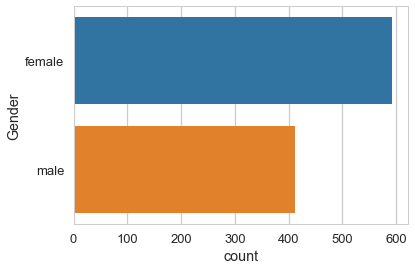

In [16]:
sb.countplot(y="Gender", data=dataset)

## Contemplamos la edad ##

Las personas que respondieron a la encuesta están en el grupo etario de 18 a 25 años, aproximadamente. Casualmente  aquellos a los que se apunta con el artículo inicial.

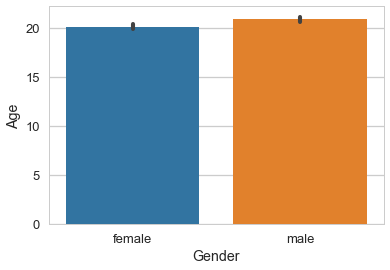

In [17]:
sb.barplot(x="Gender", y="Age", data=dataset) 


## Finalmente cruzamos todos los datos ##

De este mapa podemos analizar varias tendencias interesantes:

1. El 59% de las mujeres utilizan el internet a diario.
2. El 40% de los hombres restantes también lo utilizan.
3. La diferencia entre porcentajes claramente está dada por la distribución de la muestra. Esto denota claramente que, de haber paridad de género, las tendencias se igualarían.
4. La cantidad de personas que admitieron estar conectados gran parte del día fue la misma tanto para hombres como para mujeres. Si bien esto habla de paridad, teniendo en cuenta la distribución indica que los hombres son más propensos a la denominada "hiperconectividad".

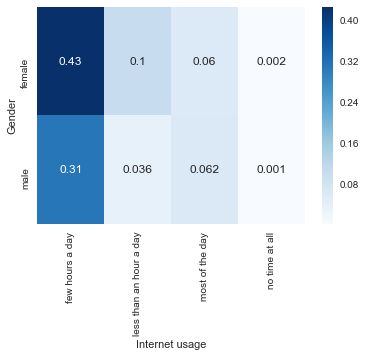

In [18]:
ct2 = pd.crosstab(index=dataset["Gender"], columns=dataset["Internet usage"], margins=False, normalize=True)
sb.set()
sb.heatmap(ct2,cmap="Blues", annot=True)

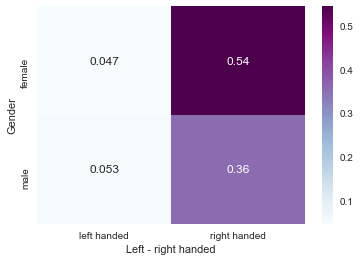

In [19]:
ct2 = pd.crosstab(index=dataset["Gender"], columns=dataset["Left - right handed"], margins=False, normalize=True)
sb.set()
sb.heatmap(ct2,cmap="BuPu", annot=True)

## Resumen ##

Si bien este es un estudio realizado entre un grupo de jóvenes, podemos observar que la paridad de la distribución en sus aspectos género y edad nos permite inferir que la juventud está en contacto permanente con internet. Si bien es cierto que varía la cantidad de horas, es importante destacar que la necesidad está inmersa en la sociedad. Podemos garantizar que las tendencias continuarán en alza, expandiéndose hacia los diferentes grupos etarios y alcanzando por igual a los diferentes géneros.

Por todo esto podemos asegurar que no existe una correlación cuando se trata de analizar el uso a internet. Debido a que cada vez más contenidos se encuentran dentro de la red, nos es imposible estudiar, trabajar o simplemente entretenernos sin entrar en contacto con la gigantesca nube que nos rodea.

****

 
## Test de Chi-cuadrado ($\chi^2$) para confirmar la idependencia  o no de los datos de la muestra ##


#### El test de independencia de $\chi^2$, lo podemos realizar de manera manual ó bien utilizando la librería "scipy.stats". En nuestro caso vamos a mostrar en primer lugar como sería el cálculo manual y luego usaremos la función "chi2_contingency".
#### Además, el test $\chi^2$, define las hipótesis de la siguiente manera:
$$H_0 = Las\;variables\;son\;independientes\;(Hipotesis\;nula)$$
$$H_1 = Las\;variables\;estan\;relacionadas$$

Dado  que en nuestro análisis vimos el Uso de internet y la prevalencia de zurdos (dado que ambos somos zurdos), sólo nos concentraremos en estos dos casos para hacer el análisis de $\chi^2$

In [20]:
print("\nRelación Género - Uso de Internet, Manual\n")
inte_genero = pd.crosstab(dataset.Gender, dataset['Internet usage'],         margins=True, normalize=True)
inte_genero2 = pd.crosstab(dataset.Gender, dataset['Internet usage'], margins=True)
expected = np.outer(inte_genero["All"][0:2],inte_genero.ix["All"][0:4])/inte_genero["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["few hours a day","less than an hour a day","most of the day","no time at all"] 
expected.index = ["female","male"]
chi_squared_stat = (((inte_genero2-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 3)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=3)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Internet usage" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= inte_genero2)
print("\nRelación Género - Uso de Internet, usando Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Internet usage')



Relación Género - Uso de Internet, Manual

Chi2 = 1024542.2613984427
P_valor = 0.0

Relación Género - Uso de Internet, usando Scipy

Chi2 = 18.459423703628325
P_valor = 0.0180338820583029

Las variables son DEPENDIENTES


In [21]:
print("\nRelación Género - Uso de la mano Izquierda(Zurdos), Manual\n")
zurdo_genero = pd.crosstab(dataset.Gender, dataset['Left - right handed'],  margins=True, normalize=True)
zurdo_genero2 = pd.crosstab(dataset.Gender, dataset['Left - right handed'], margins=False)
expected = np.outer(zurdo_genero["All"][0:2],zurdo_genero.ix["All"][0:2])/zurdo_genero["All"]["All"]
expected = pd.DataFrame(expected)
expected.columns = ["left handed","right handed"] 
expected.index = ["female","male"]
chi_squared_stat = (((zurdo_genero2-expected)**2)/expected).sum().sum()
print("Chi2 = "+str(chi_squared_stat))
crit = stats.chi2.ppf(q = 0.95, # 95% de confianza*
                      df = 1)   
#print("Valor crítico = "+str(crit))
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat, df=1)
print("P_valor = "+str(p_value))

#Test de independencia Chi-Cuadrado para "Gender" y "Internet usage" (cálculo mediante función de scipy)
chi2, p, dof, ex = stats.chi2_contingency(observed= zurdo_genero2, correction=False)
print("\nRelación Género - Uso de la mano Izquierda(Zurdos), usando Scipy\n")
print("Chi2 = "+str(chi2))
print("P_valor = "+str(p))

if p>0.05:
    print("\nLas variables son INDEPENDIENTES")
else:
    print("\nLas variables son DEPENDIENTES")
    var_cat_interest.append('Internet usage')



Relación Género - Uso de la mano Izquierda(Zurdos), Manual

Chi2 = 1006667.4894856946
P_valor = 0.0

Relación Género - Uso de la mano Izquierda(Zurdos), usando Scipy

Chi2 = 6.660828657037643
P_valor = 0.009855507556855131

Las variables son DEPENDIENTES


#### En ambos casos, dado que $p_{valor}<0.05$, podemos rechazar la hipótesis nula de que las variables son independientes. 

Analizando en detalle los datos, podemos observar que las personas de género femenino son mas propensas a "sentirse solas y deprimidas" a pesar de estar mas conectadas utilizando internet.
Mientras que las personas de género masculino son mas propensas a ser zurdas.